In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd


In [ ]:
import time
import psutil
import os
# Hàm để lấy thông tin RAM và disk usage
def get_system_usage():
    # RAM usage
    memory_info = psutil.virtual_memory()
    ram_usage = memory_info.used / (1024 ** 3)  # convert to GB

    # Disk usage
    disk_info = psutil.disk_usage('/')
    disk_usage = disk_info.used / (1024 ** 3)  # convert to GB

    return ram_usage, disk_usage

# Ghi nhận thời gian bắt đầu và thông tin hệ thống
start_time = time.time()
initial_ram_usage, initial_disk_usage = get_system_usage()

# Huấn luyện mô hình dùng API

In [ ]:
# Tải tệp CSV
features_train_file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Mining_TH/Đồ Án Cuối Môn_KKDL/Đánh Giá So Sánh/Dataset_CSV_3labels/Copy of 3labels_features_train.csv'
features_test_file_path = '/content/drive/MyDrive/Colab Notebooks/Data_Mining_TH/Đồ Án Cuối Môn_KKDL/Đánh Giá So Sánh/Dataset_CSV_3labels/Copy of 3labels_features_test.csv'
features_train_df = pd.read_csv(features_train_file_path)
features_test_df = pd.read_csv(features_test_file_path)

In [ ]:
print(features_train_df.columns)
print(features_test_df.columns)

Index(['mean_intensity', 'variance_intensity', 'skewness_intensity',
       'kurtosis_intensity', 'entropy_intensity', 'energy_intensity',
       'contrast_0', 'contrast_45', 'contrast_90', 'contrast_135',
       'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90',
       'dissimilarity_135', 'homogeneity_0', 'homogeneity_45',
       'homogeneity_90', 'homogeneity_135', 'energy_0', 'energy_45',
       'energy_90', 'energy_135', 'correlation_0', 'correlation_45',
       'correlation_90', 'correlation_135', 'label'],
      dtype='object')
Index(['mean_intensity', 'variance_intensity', 'skewness_intensity',
       'kurtosis_intensity', 'entropy_intensity', 'energy_intensity',
       'contrast_0', 'contrast_45', 'contrast_90', 'contrast_135',
       'dissimilarity_0', 'dissimilarity_45', 'dissimilarity_90',
       'dissimilarity_135', 'homogeneity_0', 'homogeneity_45',
       'homogeneity_90', 'homogeneity_135', 'energy_0', 'energy_45',
       'energy_90', 'energy_135', 'correlation_

In [ ]:
# Tạo tập dữ liệu từ F/E gốc
X_train = features_train_df.drop('label', axis=1)
y_train = features_train_df['label']
X_test = features_test_df.drop('label', axis=1)
y_test = features_test_df['label']

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Khởi tạo mô hình RandomForest
model = RandomForestClassifier(n_estimators=300,
                                max_depth=20)

In [ ]:
# Huấn luyện mô hình
model.fit(X_train_scaled, y_train_encoded)
# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
# Đánh giá mô hình
accuracy = accuracy_score(y_test_encoded, y_pred)
report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.782608695652174
Classification Report:
                    precision    recall  f1-score   support

Michelia chapensis       0.76      0.91      0.83        35
          Platanus       0.77      0.71      0.74        28
Sapindus saponaria       0.83      0.69      0.75        29

          accuracy                           0.78        92
         macro avg       0.79      0.77      0.78        92
      weighted avg       0.79      0.78      0.78        92



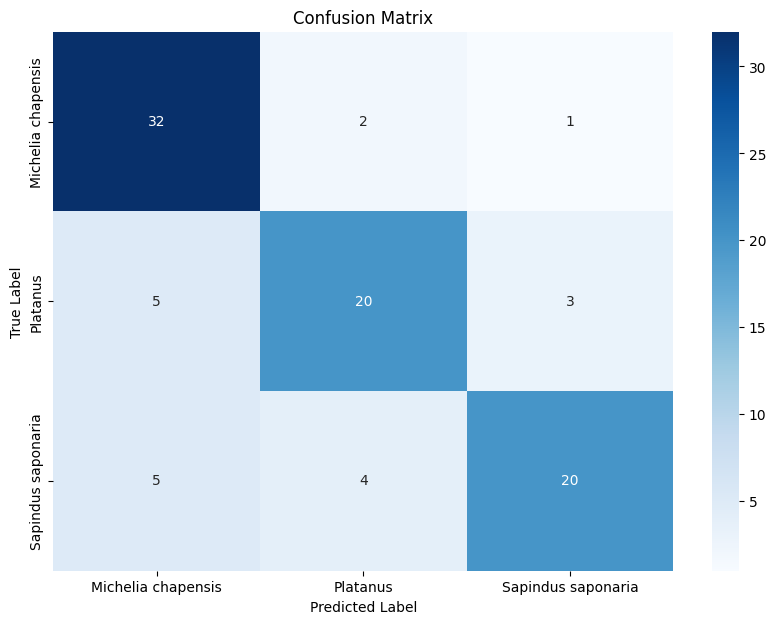

array([[32,  2,  1],
       [ 5, 20,  3],
       [ 5,  4, 20]])

In [ ]:
# Trực quan hóa ma trận nhầm lẫn
cm = confusion_matrix(y_test_encoded, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
cm

In [ ]:
# Ghi nhận thời gian kết thúc và thông tin hệ thống
end_time = time.time()
final_ram_usage, final_disk_usage = get_system_usage()

# Tính toán thời gian chạy, RAM và disk usage
execution_time = end_time - start_time
ram_usage_diff = final_ram_usage - initial_ram_usage
disk_usage_diff = final_disk_usage - initial_disk_usage

print(f'Execution Time: {execution_time} seconds')
print(f'RAM Usage Increase: {ram_usage_diff} GB')
print(f'Disk Usage Increase: {disk_usage_diff} GB')

Execution Time: 3.6914241313934326 seconds
RAM Usage Increase: -0.023677825927734375 GB
Disk Usage Increase: 9.1552734375e-05 GB
